<a href="https://colab.research.google.com/github/Pakhi27/Seoul-Bike-Demand-KNN-Regression/blob/main/Seoul_Bike_Demand_KNN_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Seoul Bike Demand Analysis

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('SeoulBikeData.csv',encoding='latin-1')

In [71]:
dataset=pd.DataFrame(df)

In [72]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [73]:
# Exploratory Data Analysis

In [74]:
df.isnull()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

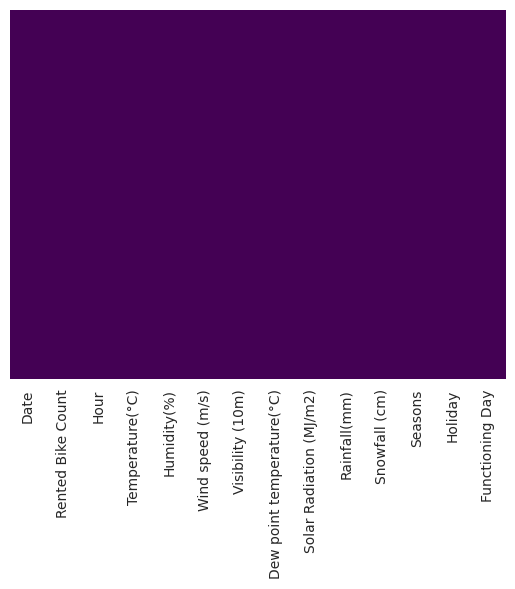

In [76]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# import random

# # Assuming your data is loaded into a pandas DataFrame named 'df'

# # Set the desired sample size (number of rows to sample)
# sample_size = 2000  # Adjust this value as needed

# index_list = df.index.tolist()
# # Randomly sample rows from the DataFrame
# sample = random.sample(index_list, sample_size)  # Sample by row index

# # Select the rows based on the sampled indices
# df = df.loc[sample]

# print(df.shape)  # Print the shape of the reduced DataFrame

In [ ]:

sns.set_style('whitegrid')
sns.countplot(x='Rented Bike Count',data=df)


<Axes: xlabel='Rented Bike Count', ylabel='count'>

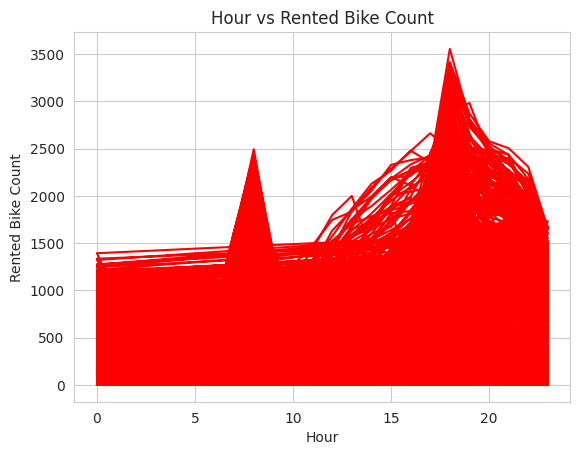

In [77]:
x=df['Hour']
y=df['Rented Bike Count']
plt.plot(x,y,color="red")
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Hour vs Rented Bike Count')
plt.show()

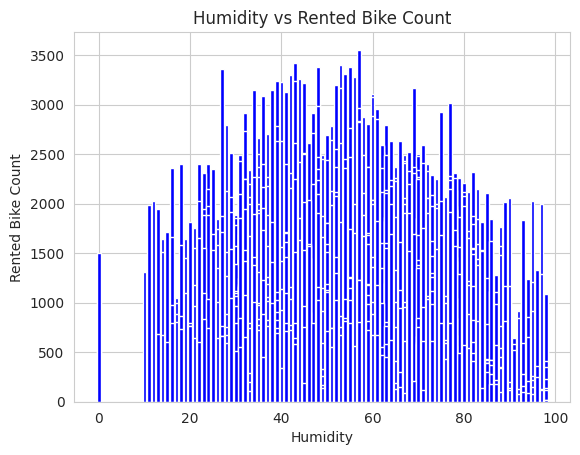

In [78]:
x=df['Humidity(%)']
y=df['Rented Bike Count']
plt.bar(x,y,color="blue")
plt.xlabel('Humidity')
plt.ylabel('Rented Bike Count')
plt.title('Humidity vs Rented Bike Count')
plt.show()

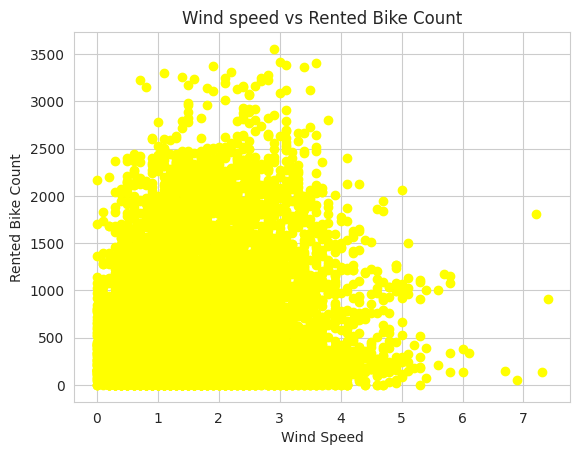

In [79]:

x=df['Wind speed (m/s)']
y=df['Rented Bike Count']
plt.scatter(x,y,color="yellow")
plt.xlabel('Wind Speed')
plt.ylabel('Rented Bike Count')
plt.title('Wind speed vs Rented Bike Count')
plt.show()

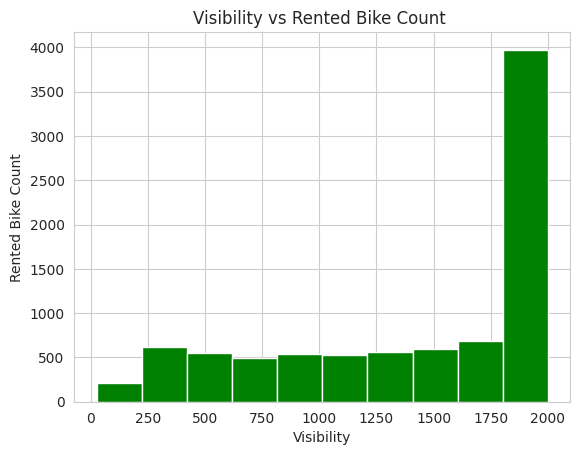

In [80]:
x=df['Visibility (10m)']
y=df['Rented Bike Count']
plt.hist(x,color="green")
plt.xlabel('Visibility')
plt.ylabel('Rented Bike Count')
plt.title('Visibility vs Rented Bike Count ')
plt.show()


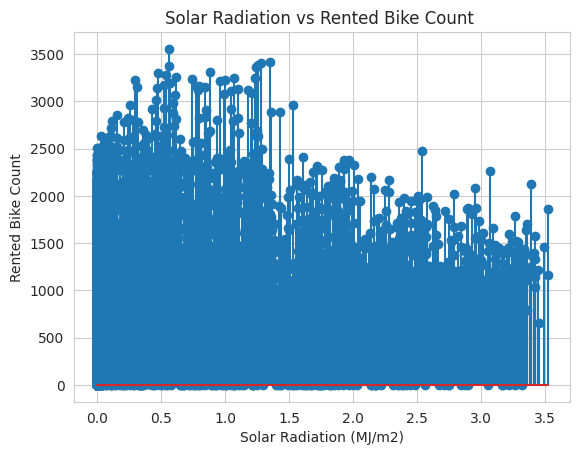

In [81]:
x=df['Solar Radiation (MJ/m2)']
y=df['Rented Bike Count']
plt.stem(x,y)
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.title('Solar Radiation vs Rented Bike Count ')
plt.show()

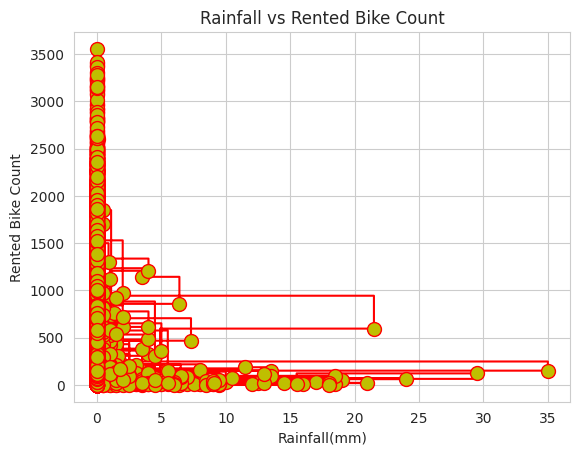

In [82]:
x=df['Rainfall(mm)']
y=df['Rented Bike Count']
plt.step(x,y,marker="o",color="r",ms=10,mfc="y")
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.title('Rainfall vs Rented Bike Count')
plt.show()

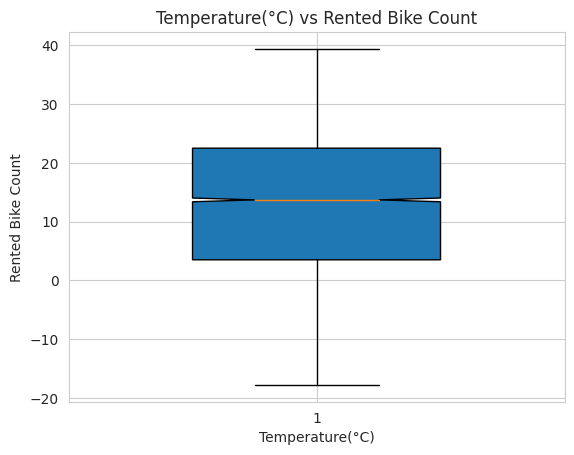

In [83]:
x=df['Temperature(°C)']
y=df['Rented Bike Count']
plt.boxplot(x,notch=True,vert=True,widths=0.5,patch_artist=True)
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.title('Temperature(°C) vs Rented Bike Count')
plt.show()


In [ ]:
# converting categorical values

In [84]:
pd.get_dummies(df['Seasons'],drop_first=True).head()
pd.get_dummies(df['Holiday'],drop_first=True).head()
pd.get_dummies(df['Functioning Day'],drop_first=True).head()

,Yes
0,True
1,True
2,True
3,True
4,True


In [86]:
Seasons=pd.get_dummies(df['Seasons'],drop_first=True)
Holiday=pd.get_dummies(df['Holiday'],drop_first=True)
FunctioningDay=pd.get_dummies(df['Functioning Day'],drop_first=True)

In [87]:
df.drop('Seasons',axis=1,inplace=True)
df.drop('Holiday',axis=1,inplace=True)
df.drop('Functioning Day',axis=1,inplace=True)

In [88]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [91]:
df=pd.concat([df,Seasons],axis=1)
df=pd.concat([df,Holiday],axis=1)
df=pd.concat([df,FunctioningDay],axis=1)

In [92]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,No Holiday,Yes
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,False,False,True,True,True
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,False,False,False,True,True
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,False,False,False,True,True
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,False,False,False,True,True
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,False,False,False,True,True


In [ ]:
# Building a KNN Regression Model

In [155]:

X=df.drop('Rented Bike Count',axis=1)
y=df['Rented Bike Count']

In [157]:
column_to_drop = 'Date'

# Drop the column from X_train (modifies the original DataFrame)
X.drop(column_to_drop, axis=1, inplace=True)

In [159]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,No Holiday,Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,False,False,True,True,True
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,False,False,True,True,True
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,False,False,False,True,True
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,False,False,False,True,True
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,False,False,False,True,True
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,False,False,False,True,True


In [151]:
df['Rented Bike Count'].head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [152]:
from sklearn.model_selection import train_test_split

In [153]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [97]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

ValueError: could not convert string to float: '30/01/2018'

In [140]:
# Training and Predicting

import pandas as pd
from datetime import datetime
from sklearn.neighbors import KNeighborsRegressor
Regressor=KNeighborsRegressor(n_neighbors=5)


from sklearn.preprocessing import OneHotEncoder

# Assuming 'X_train' is a pandas dataframe containing the string column
categorical_cols = ['Date']

# Create the OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder to the categorical columns in X_train and X_test
encoder.fit(X_train[categorical_cols])
encoder.fit(X_test[categorical_cols])


# Transform the categorical columns in X_train and X_test
X_train_encoded = encoder.transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Now you can use X_train_encoded (containing one-hot encoded features) to fit your KNeighborsRegressor
Regressor.fit(X_train_encoded, y_train)


KNeighborsRegressor()

In [128]:
y_pred=Regressor.predict(X_test_encoded)

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
mse=cross_val_score(Regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
Regressor.fit(X_train_encoded, y_train)
np.mean(mse)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py", line 217, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 454, in _fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 810, in check_array
    array = array.astype(new_dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 451, in astype
    return self.apply(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 187, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 138, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: '18/11/2018'

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py", line 217, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 454, in _fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 810, in check_array
    array = array.astype(new_dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 451, in astype
    return self.apply(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 187, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 138, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: '30/01/2018'


In [131]:
y_pred=Regressor.predict(X_test_encoded)

In [132]:
from sklearn.metrics import r2_score

In [134]:
r2 = r2_score(y_test, y_pred)
r2

0.28183938832682365

In [135]:
y_pred

array([ 750.2, 1407. , 1021.2, ...,  916. ,  149.2,  292.6])

In [144]:
column_to_drop = 'Date'

# Drop the column from X_train (modifies the original DataFrame)
X_train.drop(column_to_drop, axis=1, inplace=True)

In [145]:
X_train

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,No Holiday,Yes
1444,4,-11.1,50,1.2,1986,-19.4,0.00,0.0,0.0,False,False,True,True,True
1652,20,-5.8,44,2.1,1994,-16.1,0.00,0.0,0.0,False,False,True,True,True
7496,8,11.4,66,0.8,1991,5.2,0.18,0.0,0.0,False,False,False,False,False
1893,21,-2.3,38,2.3,2000,-14.7,0.00,0.0,0.0,False,False,True,False,True
3880,16,19.1,54,3.2,542,9.5,0.94,0.0,0.0,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,22,29.9,74,2.0,1201,24.7,0.00,0.0,0.0,False,True,False,True,True
5191,7,23.5,90,0.5,445,21.7,0.05,0.5,0.0,False,True,False,True,True
5390,14,29.5,62,2.7,1941,21.4,1.79,0.0,0.0,False,True,False,True,True
860,20,-3.4,51,1.1,1391,-12.1,0.00,0.0,0.0,False,False,True,True,True


In [136]:
# Grid Search CV

In [161]:
from sklearn.pipeline import Pipeline


In [168]:
# Pipelines allow you to chain together data preprocessing steps (like scaling) and a machine learning model into a single unit.
mod=KNeighborsRegressor().fit(X, y)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsRegressor())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [169]:
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

In [170]:
pred=pipe.predict(X)

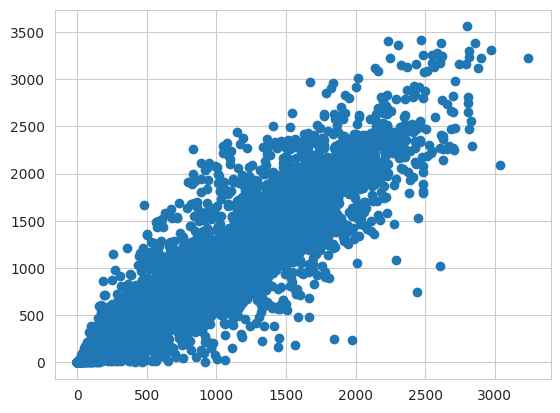

In [171]:
plt.scatter(pred,y)

In [172]:
from sklearn.model_selection import GridSearchCV

In [177]:
param_grid = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [178]:
# divide dataset into 3 parts use specific parts for traing and prediction and repeat the dataset 3 times.
grid_search=GridSearchCV(estimator=pipe,param_grid=param_grid, cv=3)

In [181]:
grid_search.fit(X, y);
pd.DataFrame(grid_search.cv_results_)
grid_search.best_params_


{'knn__n_neighbors': 10}